In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
model_data_clean = pd.read_csv("../data/processed/driver_model_data.csv")

In [3]:
X = model_data_clean[["fourg_coverage", "mobile_money_rate"]]
y = model_data_clean["account_ownership"]

driver_model = LinearRegression()
driver_model.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [4]:
baseline = model_data_clean.sort_values("year").iloc[-1]


In [5]:
scenarios = pd.DataFrame({
    "scenario": [
        "Baseline",
        "4G +10 pp",
        "Mobile Money +10 pp",
        "4G +20 & Mobile Money +10 pp"
    ],
    "fourg_coverage": [
        baseline["fourg_coverage"],
        baseline["fourg_coverage"] + 10,
        baseline["fourg_coverage"],
        baseline["fourg_coverage"] + 20
    ],
    "mobile_money_rate": [
        baseline["mobile_money_rate"],
        baseline["mobile_money_rate"],
        baseline["mobile_money_rate"] + 10,
        baseline["mobile_money_rate"] + 10
    ]
})


In [6]:
scenarios["predicted_account_ownership"] = driver_model.predict(
    scenarios[["fourg_coverage", "mobile_money_rate"]]
)


In [7]:
baseline_val = scenarios.loc[
    scenarios["scenario"] == "Baseline",
    "predicted_account_ownership"
].values[0]

scenarios["change_vs_baseline"] = (
    scenarios["predicted_account_ownership"] - baseline_val
)

scenarios


,scenario,fourg_coverage,mobile_money_rate,predicted_account_ownership,change_vs_baseline
0,Baseline,70.8,9.45,49.000000,0.000000
1,4G +10 pp,80.8,9.45,49.000000,0.000000
2,Mobile Money +10 pp,70.8,19.45,55.315789,6.315789
3,4G +20 & Mobile Money +10 pp,90.8,19.45,55.315789,6.315789


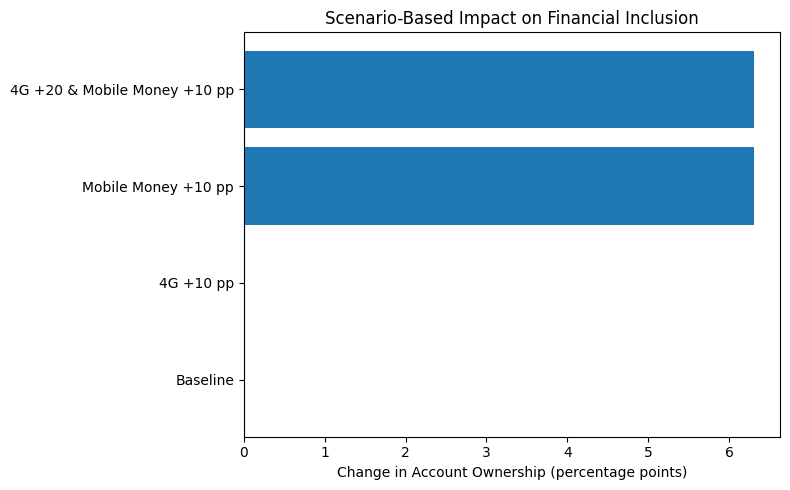

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    scenarios["scenario"],
    scenarios["change_vs_baseline"]
)
plt.axvline(0)
plt.xlabel("Change in Account Ownership (percentage points)")
plt.title("Scenario-Based Impact on Financial Inclusion")
plt.tight_layout()
plt.show()
